In [6]:
import pandas as pd
import numpy as np
# from mlxtend.preprocessing import TransactionEncoder
# from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

# drive.mount('/content/drive')
# dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flight.csv")
dataframe = pd.read_csv("flight.csv")

In [7]:
dataframe.columns[dataframe.isna().any()]

Index(['Arrival Delay in Minutes'], dtype='object')

In [8]:
dataframe["Arrival Delay in Minutes"]=dataframe["Arrival Delay in Minutes"].fillna(dataframe["Arrival Delay in Minutes"].mean())
#drop useless columns
dataframe=dataframe.drop('id',1)
dataframe=dataframe.drop('index',1)

## **Q1:EDA**

**Non-numerical values**

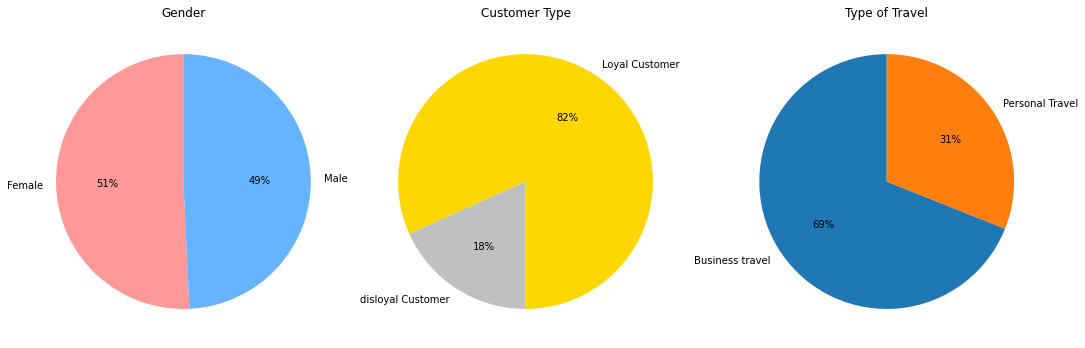

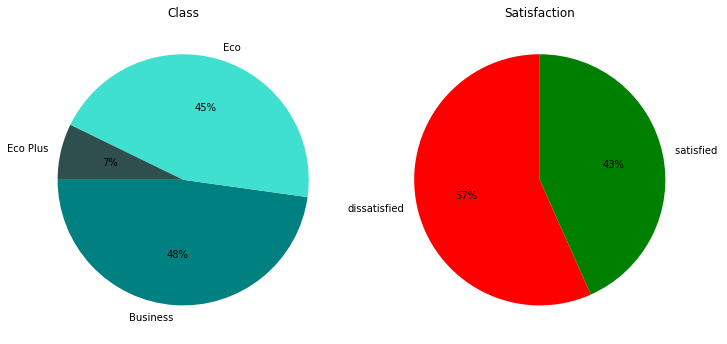

In [9]:
# create subplot 1
f, (ax1, ax2,ax3) = plt.subplots(1, 3,constrained_layout=True,figsize=(15, 10))

# pie chart for gender
y=dataframe.Gender.value_counts(normalize=True)
ax1.set_title("Gender")
ax1.pie(y,labels=['Female','Male'],startangle = 90,colors = ['#ff9999','#66b3ff'],autopct='%1.0f%%')

#piechart for Customer Type
ax2.set_title("Customer Type")
y=dataframe['Customer Type'].value_counts(normalize=True)
ax2.pie(y,labels=['Loyal Customer','disloyal Customer'],startangle = 270,autopct='%1.0f%%',colors=["gold","silver"])

#piechart for Type of Travel
ax3.set_title("Type of Travel")
ax3.pie(dataframe['Type of Travel'].value_counts(normalize=True),labels=['Business travel','Personal Travel'],startangle = 90,autopct='%1.0f%%');

# create subplot 2
f, (ax1, ax2) = plt.subplots(1, 2,constrained_layout=True,figsize=(10, 7))
##piechart for Type of Class
ax1.set_title("Class")
class_colors=["teal","turquoise","darkslategrey"]
ax1.pie(dataframe['Class'].value_counts(normalize=True),labels=['Business','Eco','Eco Plus'],startangle = 180,autopct='%1.0f%%',colors=class_colors)
#Pie chart for satisfaction
ax2.set_title("Satisfaction")
ax2.pie(dataframe['satisfaction'].value_counts(normalize=True),labels=['dissatisfied','satisfied '],colors=["red","green"],startangle = 90,autopct='%1.0f%%');

**Numerical values**

Age


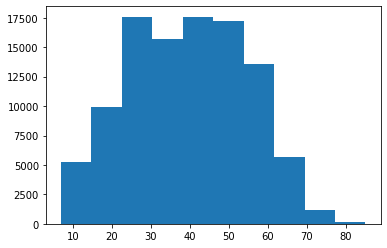

In [10]:
#plot for Age
print("Age")
plt.hist(dataframe.Age)
# plt.set_title("Age")
plt.show()

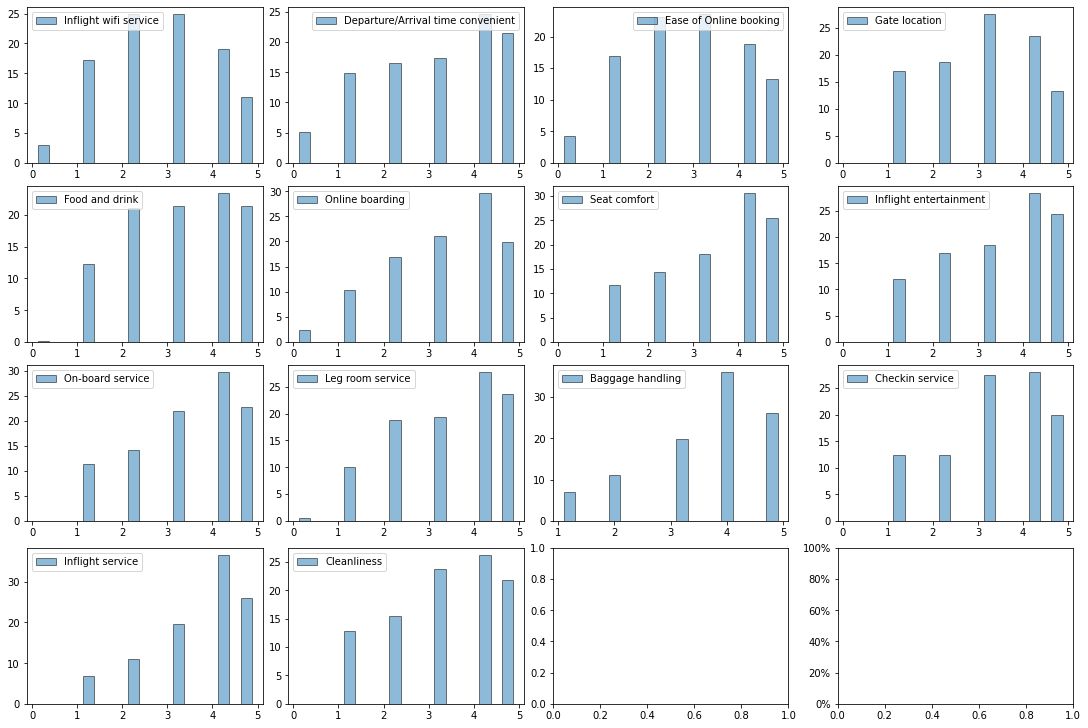

In [11]:
from matplotlib.ticker import PercentFormatter
# # create subplot 
f, ((ax1, ax2,ax3,ax4),(ax5, ax6,ax7,ax8),(ax9, ax10,ax11,ax12),(ax13, ax14,ax15,ax16)) = plt.subplots(4, 4,constrained_layout=True,figsize=(15, 10))
i=1
cols=dataframe.columns[6:20]
for col in cols:
  data=dataframe[col]
  ax=globals()['ax'+str(i)]
  ax.hist(data,alpha=0.5, histtype='bar', ec='black',rwidth=0.5, weights=np.ones(len(data)) / len(data)*100)
  ax.legend([col,"percent"])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  i=i+1
  if i>16:
    break

(array([9.86189175e+01, 1.18955959e+00, 1.56875577e-01, 1.92485371e-02,
        6.73698799e-03, 4.81213428e-03, 1.92485371e-03, 0.00000000e+00,
        9.62426856e-04, 9.62426856e-04]),
 array([   0. ,  159.2,  318.4,  477.6,  636.8,  796. ,  955.2, 1114.4,
        1273.6, 1432.8, 1592. ]),
 <BarContainer object of 10 artists>)

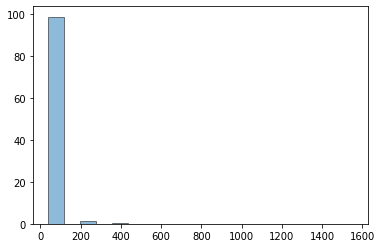

In [12]:
plt.hist(dataframe["Departure Delay in Minutes"],alpha=0.5, histtype='bar', ec='black',rwidth=0.5, weights=np.ones(len(data)) / len(data)*100)
# ,height=5, aspect=1.9,stat="percent",kind="hist"

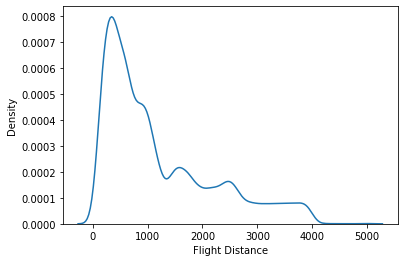

In [13]:
sns.kdeplot(data=dataframe,x=dataframe["Flight Distance"]);

# **Q2**

   ## **2.1 Preproccessing**

### **Data cleaning**

In [14]:
#missing values
# dataframe.isna()
dataframe=dataframe.dropna()
#didn't find anything

In [15]:
# data=dataframe
# data.loc[(data['Gender'] != 'Female') & (data['Gender'] != 'Male')]

In [16]:
dataframe.head()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### **Categorical Encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder# creating initial dataframe
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
categorical_columns=["Gender","Customer Type","Type of Travel","Class","satisfaction"]   
for i in categorical_columns:   
  # dataframe[i]=dataframe[i].astype('category')  
  dataframe[i] = labelencoder.fit_transform(dataframe[i])
# dataframe
# dataframe.head()

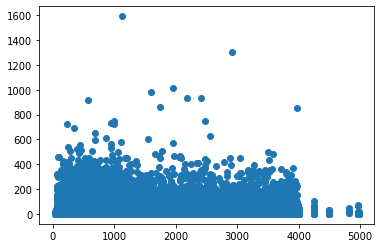

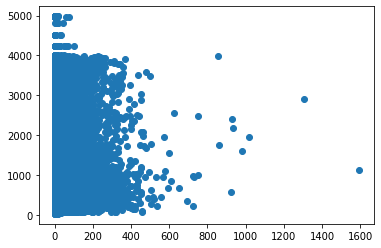

In [18]:
# df.price = df.price.apply(remove_sign,sign='$')
# sns.boxplot(y='Flight Distance', x='Departure Delay in Minutes',data=dataframe)
# plt.xticks(rotation=90)
plt.scatter(dataframe["Flight Distance"], dataframe["Departure Delay in Minutes"])
plt.show()
plt.scatter(dataframe["Departure Delay in Minutes"], dataframe["Flight Distance"])
plt.show()
# plt.scatter(dataframe["Flight Distance"], dataframe["Arrival Delay in Minutes"])
# plt.show()
# plt.scatter(dataframe["Departure Delay in Minutes"], dataframe["Arrival Delay in Minutes"])
# plt.show()

### **Handling outliers**

In [19]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

def replace_outliers(datacolumn,lowerbound,upperbound,median):
  datacolumn=datacolumn.mask(datacolumn>upperbound,median)
  datacolumn=datacolumn.mask(datacolumn<lowerbound,median)
  return datacolumn

outlier_columns=["Flight Distance"] #,"Arrival Delay in Minutes","Departure Delay in Minutes"
for i in outlier_columns:
  print(i,"sum",dataframe[i].sum())
  data_column=dataframe[i][:]
  median=data_column.median()
  lowerbound,upperbound = outlier_treatment(data_column)
  dataframe[i]=replace_outliers(data_column,lowerbound,upperbound,median)
  # print(i,"sum",dataframe[i].sum())

Flight Distance sum 123588444


### **Normlizing**

In [20]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit(dataframe.iloc[:,:-1]).transform(dataframe.iloc[:,:-1])
# df_scaled_data = pd.DataFrame(scaled_data)
# stasfied=dataframe.iloc[:,22]
# df_scaled_data.reset_index(drop=True, inplace=True)
# stasfied.reset_index(drop=True, inplace=True)
# df_normal = pd.concat([df_scaled_data, stasfied], axis=1)
# a=dataframe.columns.tolist()
# df_normal=df_normal.set_axis(a, axis=1, inplace=False)
# df_normal

In [21]:
# m=dataframe["Flight Distance"][:]
# print(m.min(),m.max())
# m=pd.cut(dataframe["Flight Distance"], bins=[0, 400, 500, 1000,2000],labels=[0, 40, 50, 100])
# print(m)

# **Q3**

## **Decision Tree Algoeithm**

In [22]:
print("Percentage of satisfaction Customer",len(dataframe[dataframe['satisfaction']==1])/len(dataframe))

Percentage of satisfaction Customer 0.43333269171542965


In [23]:
print("Percentage of dissatisfaction Customer",len(dataframe[dataframe['satisfaction']==0])/len(dataframe))

Percentage of dissatisfaction Customer 0.5666673082845703


In [24]:
dataframe =dataframe.sample(frac=1)
dataframe.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
55561,1,0,59,0,0,328,3,3,3,3,...,5,5,5,5,5,5,5,0,0.0,1
27827,1,1,25,0,0,173,5,5,5,2,...,4,4,3,4,5,5,4,0,0.0,1
69108,0,0,55,0,0,3252,5,5,5,5,...,5,5,5,5,4,5,5,0,0.0,1
38614,1,0,22,1,1,517,1,4,1,2,...,4,3,3,4,3,5,4,0,0.0,0
95817,1,0,33,0,0,3212,1,1,1,1,...,5,3,5,5,4,4,5,2,46.0,1


In [42]:
from sklearn.model_selection import cross_val_score

data_att =dataframe.drop(['satisfaction'],axis=1)
data_lab = dataframe['satisfaction']

scoresAll=cross_val_score(model,data_att,data_lab,cv=10)
print("Total Accuracy: %0.2f (+/- %0.2f)" %(scoresAll.mean(),scoresAll.std()*2))

Total Accuracy: 0.91 (+/- 0.00)


In [25]:
data_train = dataframe[0:500]
data_test = dataframe[500:700]

data_train_att = data_train.drop(['satisfaction'],axis=1)
data_train_lab = data_train['satisfaction']

data_test_att = data_test.drop(['satisfaction'],axis=1)
data_test_lab = data_test['satisfaction']

In [26]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
model = model.fit(data_train_att,data_train_lab)

In [27]:
model.score(data_test_att,data_test_lab)

0.86

In [41]:
y_pred_1 = model.predict(data_test_att)
print(y_pred_1)

[1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0
 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0]


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result_tree_1 = confusion_matrix(data_test_lab, y_pred_1)
print("Confusion Matrix:")
print(result_tree_1)
result_tree_2 = classification_report(data_test_lab, y_pred)
print("Classification Report:",)
print (result_tree_2)

Confusion Matrix:
[[98 20]
 [ 8 74]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       118
           1       0.98      1.00      0.99        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



## **Rain Foorest Algorithm**

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
data_att =dataframe.drop(['satisfaction'],axis=1)
data_lab = dataframe['satisfaction']
data_test_att = data_test.drop(['satisfaction'],axis=1)
data_test_lab = data_test['satisfaction']
regressor = RandomForestRegressor(n_estimators=1, random_state=0)
regressor.fit(data_att, data_lab)
y_pred_2 = regressor.predict(data_test_att)

In [37]:
print(y_pred_2)

[0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1.]


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
result = confusion_matrix(data_test_lab, y_pred_2)
print("Confusion Matrix:")
print(result)
result1 = classification_report(data_test_lab, y_pred_2)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[116   2]
 [  0  82]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       118
           1       0.98      1.00      0.99        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



## **Naive Bayes Algorithm**

### **Create Test and Train data**

In [ ]:
from sklearn.model_selection import train_test_split
#input data
input_data = df_normal.iloc[:,:-1]
# print(input_data)
output_target=df_normal.iloc[:, 22]
# print(output_target)
# X_train, X_test, y_train, y_test = train_test_split(input_data, output_target, test_size = 0.3, random_state=42)
# #create dataframe and concat
# #train
# train_dataframe = pd.DataFrame(X_train)
# train_dataframe.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# train_dataframe = pd.concat([train_dataframe, y_train], axis=1)
# # train_dataframe.info()
# #test
# test_dataframe = pd.DataFrame(X_test)
# test_dataframe.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# test_dataframe = pd.concat([test_dataframe, y_test], axis=1)
train,test=train_test_split(input_data, test_size = 0.3, random_state=42)
# test.info()
# train.info()


In [ ]:
# # Guassian Naive Bayes

# from sklearn.naive_bayes import GaussianNB
# Gmodel=GaussianNB()
# Gmodel.fit(train[predictors],train[target])
# train_Gpred=Gmodel.predict(train[predictors])
# test_Gpred=Gmodel.predict(test[predictors])

# train_acc_gau=np.mean(train_Gpred==train[target])
# test_acc_gau=np.mean(test_Gpred==test[target])
# train_acc_gau#0.942
# test_acc_gau#1.0


# # #Multinomial Naive Bayes

# # from sklearn.naive_bayes import MultinomialNB
# # Mmodel=MultinomialNB()
# # Mmodel.fit(train[predictors],train[target])
# # train_Mpred=Mmodel.predict(train[predictors])
# # test_Mpred=Mmodel.predict(test[predictors])

# # train_acc_multi=np.mean(train_Mpred==train[target])
# # test_acc_multi=np.mean(test_Mpred==test[target])
# # train_acc_multi#0.704
# # test_acc_multi#0.6

In [47]:
from sklearn.neighbors import KNeighborsClassifier
data_att =dataframe.drop(['satisfaction'],axis=1)
data_lab = dataframe['satisfaction']
data_test_att = data_test.drop(['satisfaction'],axis=1)
data_test_lab = data_test['satisfaction']
model = KNeighborsClassifier(n_neighbors=3)
model.fit(data_att,data_lab)
y_pred_3 = model.predict(data_test_att)

In [48]:
print(y_pred_3)

[0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1]


In [49]:
result_knn = confusion_matrix(data_test_lab, y_pred_3)
print("Confusion Matrix:")
print(result_knn)
result_knn_2 = classification_report(data_test_lab, y_pred_3)
print("Classification Report:",)
print (result_knn_2)

Confusion Matrix:
[[107  11]
 [ 15  67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.86      0.82      0.84        82

    accuracy                           0.87       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.87      0.87       200

